# Visualizing Users

In [1]:
import pandas as pd
import numpy as np
from matplotlib.dates import datestr2num
from sklearn.preprocessing import normalize
import random

In [2]:
usecolumns = [0, 6, 12, 13, 19, 20, 21]
u1e33 = pd.read_csv('Chania/1e33.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u1e33 = np.hstack([np.zeros((len(u1e33),1), dtype=int), u1e33])
u7cbc = pd.read_csv('Chania/7cbc.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u7cbc = np.hstack([np.zeros((len(u7cbc),1), dtype=int)+1, u7cbc])
u2222 = pd.read_csv('Chania/2222.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u2222 = np.hstack([np.zeros((len(u2222),1), dtype=int)+2, u2222])
u6882 = pd.read_csv('Chania/6882.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u6882 = np.hstack([np.zeros((len(u6882),1), dtype=int)+3, u6882])
ua841 = pd.read_csv('Chania/a841.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
ua841 = np.hstack([np.zeros((len(ua841),1), dtype=int)+4, ua841])
print("Data includes user ID and...")
print(u1e33[0][1:])
Chania = np.vstack([u1e33[1:len(u1e33),:],u7cbc[1:len(u7cbc),:], u2222[1:len(u2222),:], u6882[1:len(u6882),:], ua841[1:len(ua841),:]])

/home/lilly/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,12,13,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data includes user ID and...
['timestamp' ' rssi_ios' ' measurementLat' ' measurementLon' 'cellID'
 'lac' ' mnc']


In [3]:
# Chania = np.transpose(np.vstack([Chania[:,0], datestr2num(Chania[:,1]), strorfloat(Chania[:,2]), Chania[:,3]]))
Chania = np.transpose(np.vstack([Chania[:,0], datestr2num(Chania[:,1]), Chania[:,2], Chania[:,3], Chania[:,4], Chania[:,5], Chania[:,6], Chania[:,7]]))

Only include data between April 4, 2013 and April 14, 2013

In [4]:
rows = np.where((Chania[:,1] >= Chania[0][1]) & (Chania[:,1] <= Chania[67050][1]))
Chania = Chania[rows]

In [5]:
for i in range(len(Chania[:,2])):
    try:
        Chania[:,2][i] = int(Chania[:,2][i])
        Chania[:,3][i] = float(Chania[:,3][i])
        Chania[:,4][i] = float(Chania[:,4][i])
        Chania[:,5][i] = float(Chania[:,5][i])
        Chania[:,6][i] = float(Chania[:,6][i])
        Chania[:,7][i] = float(Chania[:,7][i])
    except:
        pass

Remove data where the latitude indicates an error

In [6]:
Chania = Chania[np.where(Chania[:,3] != 0)]

Latitude and Longitudes for users 0 through 4

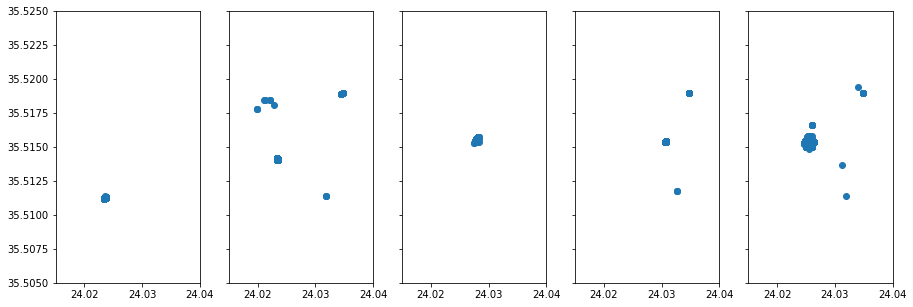

67051  points from user 0
3676  points from user 1
19161  points from user 2
93818  points from user 3
63468  points from user 4


In [339]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, sharex='all', sharey='all', figsize=(15, 5))
plt.axis([24.015,24.04, 35.505,35.525])
axes[0].scatter(Chania[np.where(Chania[:,0] == 0)][:,4], Chania[np.where(Chania[:,0] == 0)][:,3])
axes[1].scatter(Chania[np.where(Chania[:,0] == 1)][:,4], Chania[np.where(Chania[:,0] == 1)][:,3])
axes[2].scatter(Chania[np.where(Chania[:,0] == 2)][:,4], Chania[np.where(Chania[:,0] == 2)][:,3])
axes[3].scatter(Chania[np.where(Chania[:,0] == 3)][:,4], Chania[np.where(Chania[:,0] == 3)][:,3])
axes[4].scatter(Chania[np.where(Chania[:,0] == 4)][:,4], Chania[np.where(Chania[:,0] == 4)][:,3])
plt.show()

for user in [0, 1, 2, 3, 4]:
    print(len(Chania[np.where(Chania[:,0] == user)]), " points from user", user)

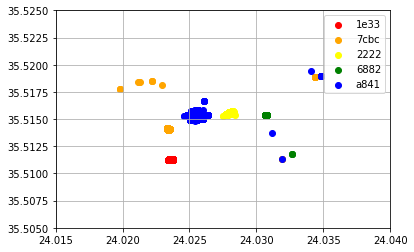

In [77]:
fig, ax = plt.subplots()
ax.scatter(Chania[np.where(Chania[:,0] == 0)][:,4], Chania[np.where(Chania[:,0] == 0)][:,3], c='red', label='1e33')
ax.scatter(Chania[np.where(Chania[:,0] == 1)][:,4], Chania[np.where(Chania[:,0] == 1)][:,3], c='orange', label='7cbc')
ax.scatter(Chania[np.where(Chania[:,0] == 2)][:,4], Chania[np.where(Chania[:,0] == 2)][:,3], c='yellow', label='2222')
ax.scatter(Chania[np.where(Chania[:,0] == 3)][:,4], Chania[np.where(Chania[:,0] == 3)][:,3], c='green', label='6882')
ax.scatter(Chania[np.where(Chania[:,0] == 4)][:,4], Chania[np.where(Chania[:,0] == 4)][:,3], c='blue', label='a841')


ax.legend()
ax.grid(True)

plt.axis([24.015,24.04,35.505,35.525])
plt.show()

points can jump at least 0.8148 km in 6 seconds

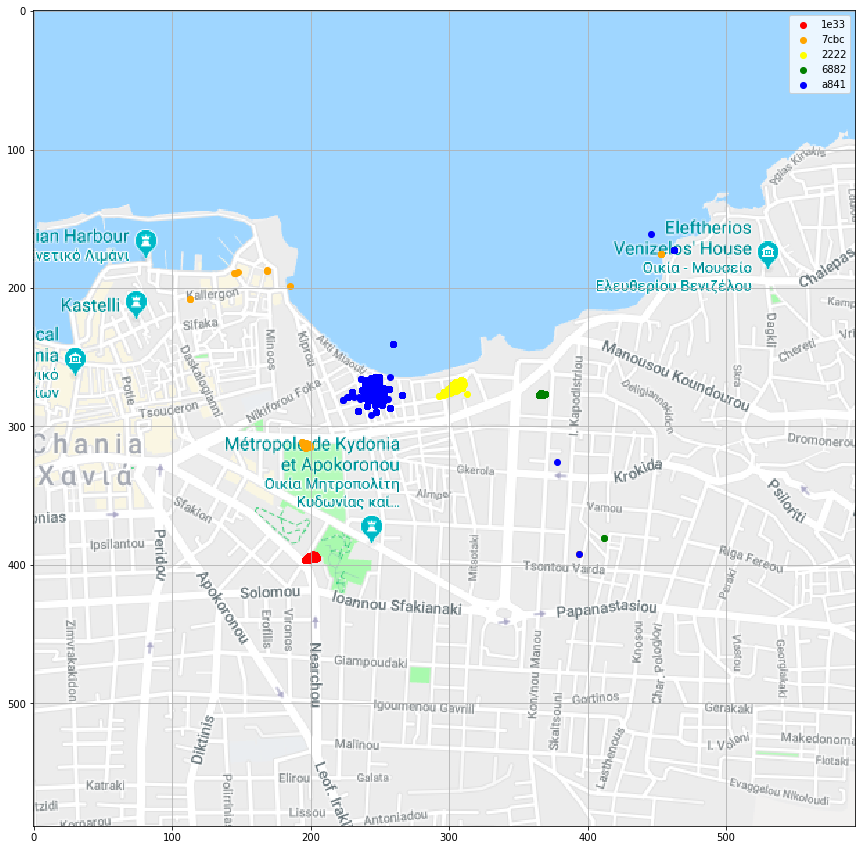

In [458]:
fig, ax = plt.subplots(figsize=(15, 15))
im = plt.imread("Chania.png")
ax.imshow(im)

def convertx(x):
    return 584/(24.04-24.015)*(x-24.015)

def converty(y):
    return 575 - 575/(35.525-35.505)*(y-35.505)

colors = ['red','orange','yellow','green','blue']
labels = ['1e33', '7cbc', '2222', '6882', 'a841']

for user in [0,1,2,3,4]:
    x = Chania[np.where(Chania[:,0] == user)][:,4]
    y = Chania[np.where(Chania[:,0] == user)][:,3]
    ax.scatter(convertx(x), converty(y), c=colors[user], label=labels[user])

ax.legend()
ax.grid(True)
plt.show()

one grid space  
0.3798 km in the x direction  
0.36895 km in the y direction

# Signal Mapping

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [526]:
Chania

array([[0, -1.8214213075476744, 0.10791951049824598, ...,
        0.0081174493016106, 0.0, 0.0],
       [0, -1.8213914714845634, 0.10791951049824598, ...,
        0.0081174493016106, 0.0, 0.0],
       [0, -1.8213616353785809, -0.34515345003519166, ...,
        0.0081174493016106, 0.0, 0.0],
       ...,
       [4, 1.7890063484397418, -0.7982264105686291, ...,
        0.0016980787420258737, 0.0, 0.0],
       [4, 1.789036184545724, -0.5716899303019104, ...,
        0.0016980787420258737, 0.0, 0.0],
       [4, 1.7890873321192329, -0.5716899303019104, ...,
        0.0016980787420258737, 0.0, 0.0]], dtype=object)

Text(0.5, 1.0, 'Reported RSSI')

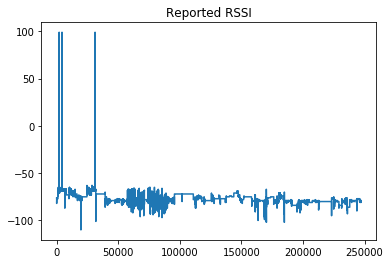

In [459]:
plt.plot(Chania[:,2])
plt.title("Reported RSSI")

Plotting RSS values: low values are dark, high values are light


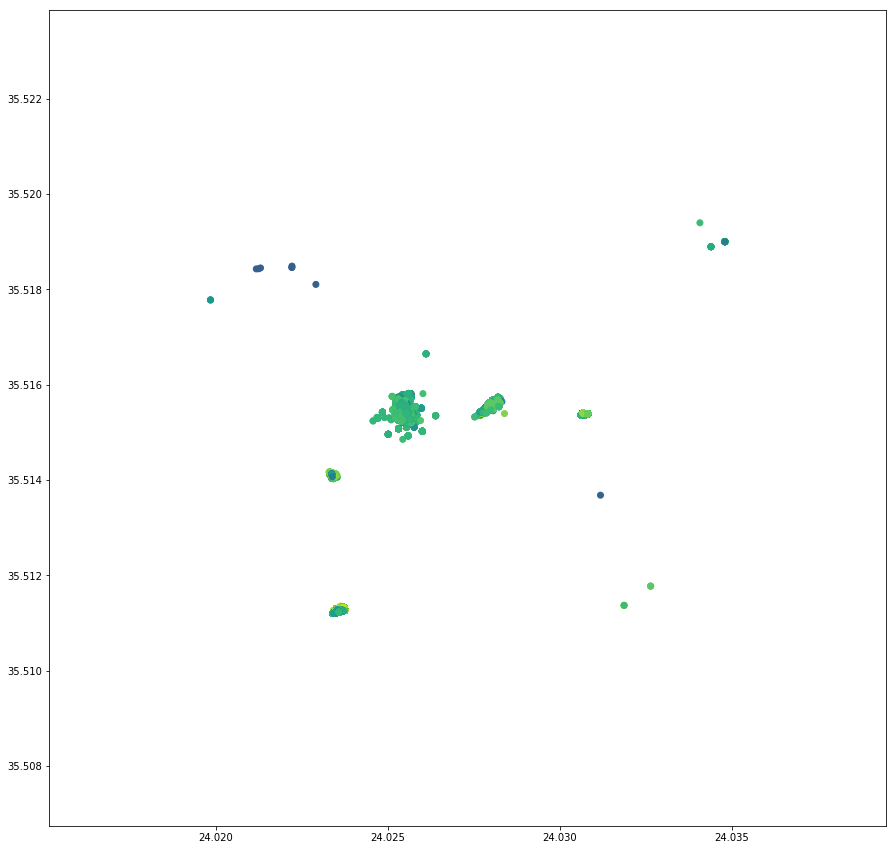

In [460]:
print("Plotting RSS values: low values are dark, high values are light")

fig, ax = plt.subplots(figsize=(15, 15))
# im = plt.imread("Chania.png")
# ax.imshow(im)

# remove possible error indicated by rssi = 99
smoothrssi = Chania[np.where(Chania[:,2]<99)]

x = smoothrssi[:,4]
y = smoothrssi[:,3]

plt.scatter(x, y, c=smoothrssi[:,2])
plt.show()

In [461]:
# data = np.hstack([smoothrssi[:,0:2], smoothrssi[:,3:8]])
# print(data)

In [462]:
# justcoords = data[:,2:4]

In [463]:
# labels = smoothrssi[:,2]
# print(labels)

In [464]:
# print(data.shape)
# print(justcoords.shape)

In [465]:
## Train on all data

# ntrain, ntest = 10000, 200
# order = np.argsort(np.random.random(labels.shape))
# train_data = data[order][0:ntrain]
# train_labels = labels[order][0:ntrain]
# test_data = data[order][ntrain:ntrain+ntest]
# test_labels = labels[order][ntrain:ntrain+ntest]

In [466]:
# ## Train on just coords

# ntrain, ntest = 10000, 200
# order = np.argsort(np.random.random(labels.shape))
# train_data = justcoords[order][0:ntrain]
# train_labels = labels[order][0:ntrain]
# test_data = justcoords[order][ntrain:ntrain+ntest]
# test_labels = labels[order][ntrain:ntrain+ntest]

## Normalized Data

In [467]:
xcoord = smoothrssi[:,4]
xcoord = (xcoord-np.mean(xcoord))/np.std(xcoord)
ycoord = smoothrssi[:,3]
ycoord = (ycoord-np.mean(ycoord))/np.std(ycoord)
zlabel = smoothrssi[:,2]
zlabel = (zlabel-np.mean(zlabel))/np.std(zlabel)

Plotting RSS values: low values are dark, high values are light


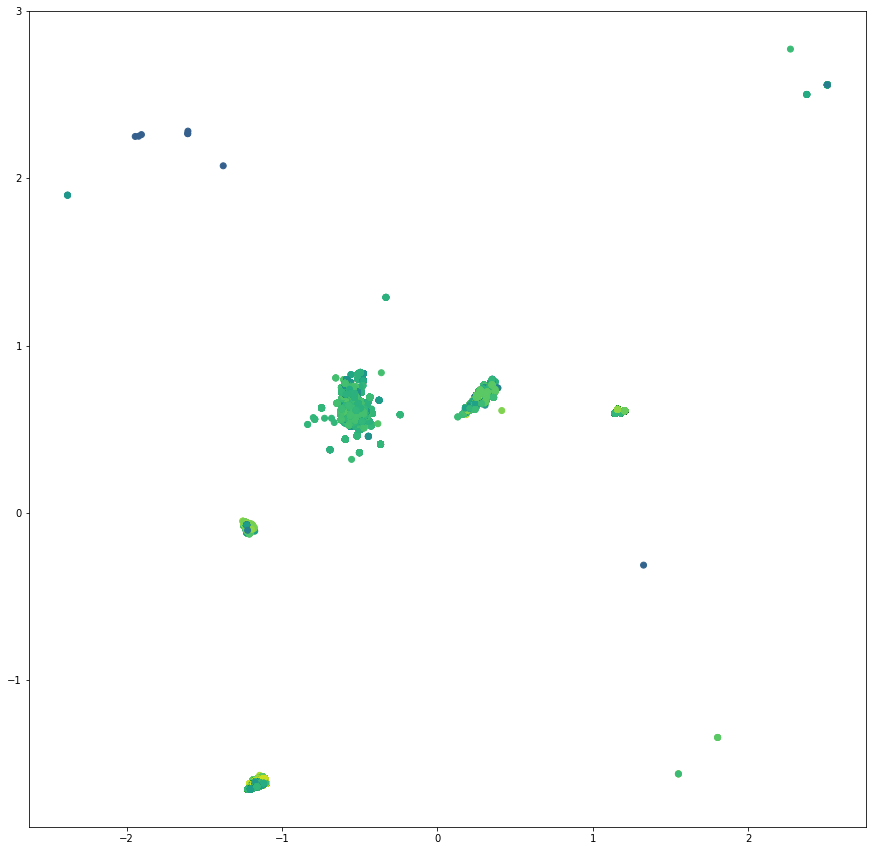

In [407]:
print("Plotting RSS values: low values are dark, high values are light")
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(xcoord, ycoord, c=zlabel)
plt.show()

In [410]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
#     optimizer = tf.train.RMSPropOptimizer(0.001)
    optimizer = tf.train.FtrlOptimizer(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [411]:
model = build_model()

In [427]:
## Train on normalized data
normcoords = np.transpose(np.vstack([xcoord, ycoord]))
normlabels = zlabel

ntrain, ntest = 800, 200
order = np.argsort(np.random.random(labels.shape))
train_data = normcoords[order][0:ntrain]
train_labels = normlabels[order][0:ntrain]
test_data = normcoords[order][ntrain:ntrain+ntest]
test_labels = normlabels[order][ntrain:ntrain+ntest]

In [468]:
print("training...")
model.fit(train_data, train_labels, epochs=100, verbose=0)
loss, mae, mse = model.evaluate(test_data, test_labels, verbose=0)
print(loss, mae, mse)

training...
0.8462934064865112 0.7330337929725647 0.8462934064865112


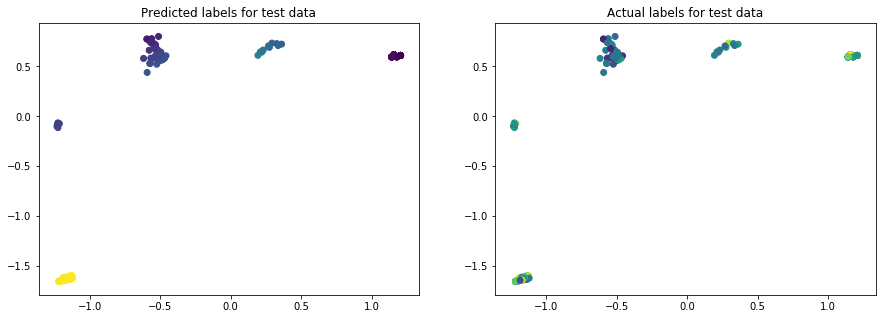

In [454]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

x = test_data[:,0]
y = test_data[:,1]

z_est = model.predict(test_data)
c_est = np.transpose(z_est).tolist()[0]
z_true = test_labels
c_true = np.transpose(z_true).tolist()

ax[0].set_title("Predicted labels for test data")
ax[0].scatter(x, y, c=c_est)
ax[1].set_title("Actual labels for test data")
ax[1].scatter(x, y, c=c_true)
plt.show()

what is this in bars on your phone

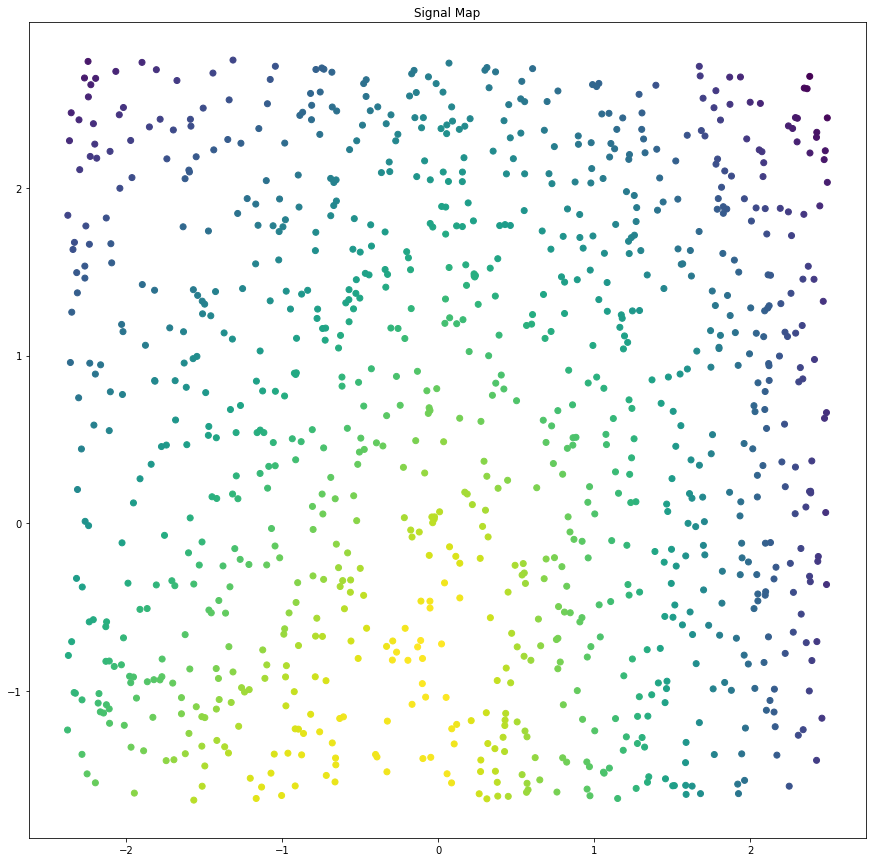

In [456]:
fig, ax = plt.subplots(figsize=(15, 15))

n = 1000
x = np.random.uniform(min(normcoords[:,0]), max(normcoords[:,0]), size=n)
y = np.random.uniform(min(normcoords[:,1]), max(normcoords[:,1]), size=n)
z = model.predict(np.transpose(np.vstack([x, y])))

c=np.transpose(z).tolist()[0]

plt.title("Signal Map")
plt.scatter(x, y, c=c)
plt.show()

## Supervised learning of user ID

In [7]:
data = Chania[:,1:8]

In [535]:
for col in range(data.shape[1]):
    try:
        data[:,col] = (data[:,col]-np.mean(data[:,col]))/np.std(data[:,col])
    except:
        data[:,col] = (data[:,col]-np.mean(data[:,col]))

In [536]:
data[0]

array([-1.821421307619281, 0.10791951049807656, -1.6141724427072166,
       -1.167363046610736, 0.00811744930159209, 0.0, 0.0], dtype=object)

In [8]:
labels = Chania[:,0]

In [511]:
ntrain, ntest = 800, 200
order = np.argsort(np.random.random(labels.shape))
train_data = data[order][0:ntrain]
train_labels = labels[order][0:ntrain]
test_data = data[order][ntrain:ntrain+ntest]
test_labels = labels[order][ntrain:ntrain+ntest]

In [512]:
model = keras.Sequential()
model.add(keras.layers.Dense(5, activation=tf.nn.relu))
model.add(keras.layers.Dense(5, activation=tf.nn.relu))
model.add(keras.layers.Dense(5, activation=tf.nn.softmax))
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [514]:
model.fit(train_data, train_labels, epochs=1000, verbose=0)
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(test_acc)

200/200 [==============================] - 0s 917us/step
1.0


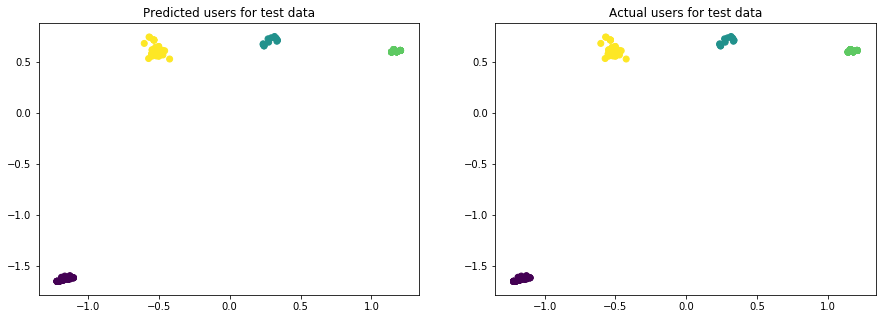

In [1009]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

x = test_data[:,3]
y = test_data[:,2]

z_est = np.argmax(model.predict(test_data), axis=1)
c_est = np.transpose(z_est).tolist()
z_true = test_labels
c_true = np.transpose(z_true).tolist()

ax[0].set_title("Predicted users for test data")
ax[0].scatter(x, y, c=c_est)
ax[1].set_title("Actual users for test data")
ax[1].scatter(x, y, c=c_true)
plt.show()

## Clustering by Predicted User ID

In [13]:
import matplotlib.pyplot as plt

In [9]:
def dist(x, y, xprime, yprime):
    return ((abs(x-xprime)**2)+(abs(y-yprime))**2)**1/2

In [10]:
def point_dist(new, old):
    y, x = new[0], new[1]
    yprime, xprime = old[0], old[1]
    return dist(x, y, xprime, yprime)

In [15]:
n_points = 100
order = np.argsort(np.random.random(data.shape[0]))
trueusers = labels[order][:n_points]
t_data = data[order][:n_points, 2:4]
n_clusters = 5

Text(0.5, 1.0, 'True Users')

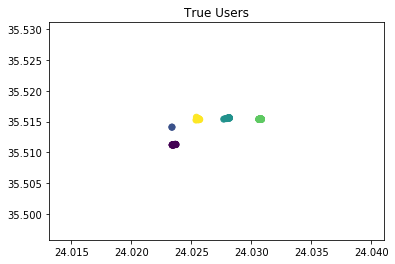

In [16]:
plt.scatter(t_data[:,1], t_data[:,0], c=trueusers)
plt.title("True Users")

In [21]:
def findlabels(ax, label, data, epsilon, plotdata, plotlabels):
    if len(data) == 0:
        return int(plotlabels[-1]+1), plotdata, plotlabels
    sorted_data, dist_from_start = sortbydistfromstart(data[0], data)
    neighbors = sorted_data[np.where(dist_from_start < epsilon)]
    labels = np.ones(len(neighbors))*label
    if label == 0:
        plotdata = neighbors
        plotlabels = labels
    else:
        plotdata = np.concatenate((plotdata, neighbors), axis=0)
        plotlabels = np.concatenate((plotlabels, labels), axis=0)

    return findlabels(ax, label+1, sorted_data[np.where(dist_from_start >= epsilon)], epsilon, plotdata, plotlabels)

In [22]:
def sortbydistfromstart(startpoint, data):
    dist_from_start = np.array(list(map(lambda point: point_dist(point, startpoint), data)))
    closeness = np.argsort(dist_from_start)
    return data[closeness], dist_from_start[closeness]

In [31]:
def cluster(mindist, maxdist, data, num_users):
    n_iter = 0
    fig, ax = plt.subplots()
    while n_iter < 50:
        n_iter += 1
        epsilon = (mindist+maxdist)/2
        num_clusters, plotdata, plotlabels = findlabels(ax, 0, data, epsilon, None, None)
        if num_clusters == num_users:
            print(epsilon, num_clusters)
            ax.scatter(plotdata[:,1], plotdata[:,0], c=plotlabels)
            ax.set_title("Guessed Users")
            return
#             return plotdata, plotlabels
        elif num_clusters < num_users:
            maxdist = epsilon
        else:
            mindist = epsilon
    print(epsilon, num_clusters)
    ax.scatter(plotdata[:,1], plotdata[:,0], c=plotlabels)
    ax.set_title("Guessed Users")
    return
#     return plotdata, plotlabels

2.2256737100072708e-06 5


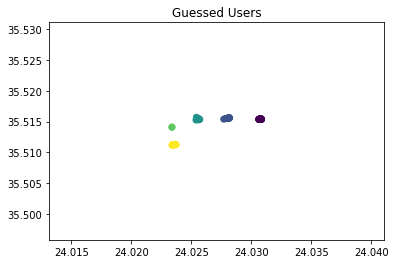

In [36]:
_, d = sortbydistfromstart(t_data[0], t_data)
cluster(0, d[-1], t_data, 5)